# Classification and Model Evaluation

In this lesson, we will use cross-validation and evaluation metrics to compare two models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn import svm
from sklearn.model_selection import KFold 
from scipy import stats 

In [2]:
df = pd.read_csv("./data/Titanic_final.csv", index_col=0)
df.head()

,Survived,Pclass,SibSp,Parch,Sex_cat,Embarked_cat,Title_cat,Is_Alone,Fare_min_max,Age_norm
0,0,3,1,0,1,2,2,0,0.014151,-0.517838
1,1,1,1,0,0,0,3,0,0.139129,0.615799
2,1,3,0,0,0,2,1,1,0.015478,-0.234429
3,1,1,1,0,0,2,3,0,0.103644,0.403242
4,0,3,0,0,1,2,2,1,0.015713,0.403242


In [3]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

### SVM classifier.
Hyperparameter:
- C: Regularization, a smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
- Kernel: The function that used to transform the original training data into a higher dimension.

In [4]:
clf_a = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_a.fit(X_train, y_train)
y_pred = clf_a.predict(X_test)
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

     0   1
0  119  15
1   22  67
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       134
           1       0.82      0.75      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



### ROC curve

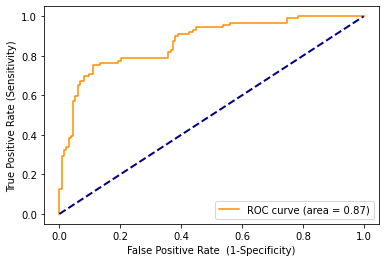

In [5]:
y_probs_a = clf_a.predict_proba(X_test) # probability prediction
fpr_a, tpr_a, threshold = metrics.roc_curve(y_test, y_probs_a[:,1])
auc_a = metrics.auc(fpr_a, tpr_a)
plt.figure()
plt.plot(fpr_a, tpr_a, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_a)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

In [6]:
roc = pd.DataFrame({'fpr': fpr_a, 'tpr': tpr_a, 't': threshold})

In [7]:
roc.head()

,fpr,tpr,t
0,0.000000,0.000000,1.891788
1,0.000000,0.011236,0.891788
2,0.000000,0.123596,0.866809
3,0.007463,0.123596,0.866553
4,0.007463,0.292135,0.854766


In [8]:
roc[roc['tpr']>0.75].head()

,fpr,tpr,t
26,0.111940,0.752809,0.596840
27,0.134328,0.752809,0.314184
28,0.134328,0.764045,0.304002
29,0.194030,0.764045,0.224800
30,0.194030,0.775281,0.222610


### Naive Bayes classifier 

In [9]:
clf_b = GaussianNB()
clf_b.fit(X_train, y_train)
y_pred = clf_b.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

,0,1
0,104,30
1,19,70


              precision    recall  f1-score   support

           0       0.85      0.78      0.81       134
           1       0.70      0.79      0.74        89

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.78      0.78       223



### ROC curve

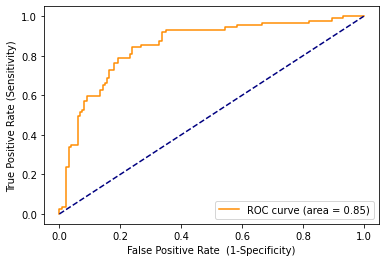

In [10]:
y_probs_b = clf_b.predict_proba(X_test) # probability prediction
fpr_b, tpr_b, _ = metrics.roc_curve(y_test, y_probs_b[:,1])
auc_b = metrics.auc(fpr_b, tpr_b)
plt.figure()
plt.plot(fpr_b, tpr_b, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate  (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

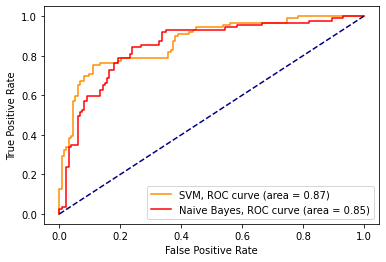

In [11]:
plt.figure()
plt.plot(fpr_a, tpr_a, color='darkorange', label='SVM, ROC curve (area = %0.2f)' %  auc_a)
plt.plot(fpr_b, tpr_b, color='red', label='Naive Bayes, ROC curve (area = %0.2f)' %  auc_b)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Model evaluation

Confusion matrix: 

|  | predicted negative | predicted positive |
|:--- | :---: | :---: |
| actual negative | TN | FP|
| actual positive | FN | TP|

- Sensitivity = Recall =  $ \frac{TP}{TP+FN} $ 
- Specificity = $ \frac{TN}{TN +FP} $
- Precision = $ \frac{TP}{TP+FP}$ 
- f1-score = $ \frac{2*precision*recall}{precision+recall}$

#### What is the evaluation metric we should use in this problem?

### Comparison between two classifiers:

In [12]:
clf_list = [clf_a,clf_b]
cm_dict, auc_dict = {}, {}
X = X.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

------ 1 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8444444444444444
Classifier:  GaussianNB()
Accuracy:  0.7888888888888889
------ 2 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8089887640449438
Classifier:  GaussianNB()
Accuracy:  0.7752808988764045
------ 3 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8539325842696629
Classifier:  GaussianNB()
Accuracy:  0.8202247191011236
------ 4 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.797752808988764
Classifier:  GaussianNB()
Accuracy:  0.7865168539325843
------ 5 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8764044943820225
Classifier:  GaussianNB()
Accuracy:  0.8314606741573034
------ 6 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.8651685393258427
Classifier:  GaussianNB()
Accuracy:  0.8426966292134831
------ 7 ------
Classifier:  SVC(C=0.9, probability=True)
Accuracy:  0.7865168539325843
Classifier:  GaussianNB()
Accuracy:  0.7752808988

In [13]:
auc_dict[clf_a]

[0.8878600823045267,
 0.8596491228070176,
 0.8721413721413722,
 0.7994350282485876,
 0.8673890608875129,
 0.9013157894736842,
 0.7746212121212122,
 0.817099567099567,
 0.8244897959183674,
 0.8931250000000001]

### Print average results:

In [14]:
acc_dict = {}
recall_dict = {}
for clf in clf_list:
    print(clf)
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    recall = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    recall_dict[clf] = recall
    print("mean recall: ", np.mean(recall))
    print("mean AUC: ", np.mean(auc_dict[clf]))

SVC(C=0.9, probability=True)
mean accuracy:  0.8293882646691635
mean recall:  0.7230136428294323
mean AUC:  0.8497126031001848
GaussianNB()
mean accuracy:  0.8013607990012485
mean recall:  0.7843470300443985
mean AUC:  0.8427647038703929


### Statistical Significance Tests
Two-sided test for the null hypothesis that two related or repeated samples have identical average (expected) values.

In [15]:
ttest,pval = stats.ttest_rel(acc_dict[clf_a], acc_dict[clf_b])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.00023631157612405545
reject null hypothesis


In [16]:
ttest,pval = stats.ttest_rel(recall_dict[clf_a], recall_dict[clf_b])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.0023422737169285805
reject null hypothesis


In [17]:
ttest,pval = stats.ttest_rel(auc_dict[clf_a], auc_dict[clf_b])
print("p-value:" , pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value: 0.4263179458381151
accept null hypothesis
